## Import library

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

D:\Users\adria\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data Example

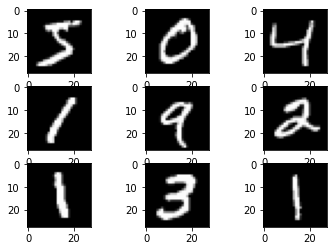

In [3]:
for i in range (9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
print('Train X = %s Train y = %s'%(X_train.shape, y_train.shape))
print('Test X = %s Test y = %s'%(X_test.shape, y_test.shape))

Train X = (60000, 28, 28) Train y = (60000,)
Test X = (10000, 28, 28) Test y = (10000,)


## Normalize the network so the value on each pixel gonna be scale 0 - 1

In [5]:
import tensorflow as tf

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

## Build the model

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

## Define the parameter

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the data

In [8]:
model.fit(X_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2605 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1110 - accuracy: 0.9651
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0757 - accuracy: 0.9764


## Calculate validation loss and validation accuracy

In [9]:
val_loss, val_acc = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 831us/step - loss: 0.0941 - accuracy: 0.9707


In [10]:
print(f'val loss = {val_loss}, val_acc = {val_acc}')

val loss = 0.09407136589288712, val_acc = 0.9707000255584717


## Prediction Result

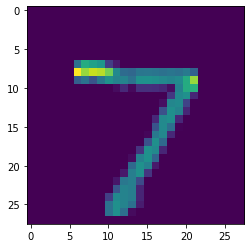

result = 7


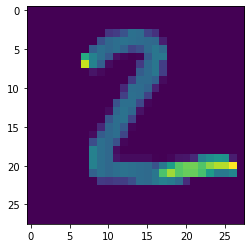

result = 2


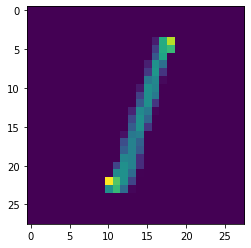

result = 1


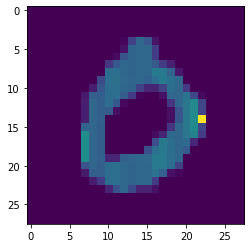

result = 0


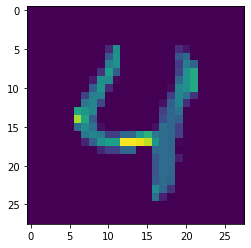

result = 4


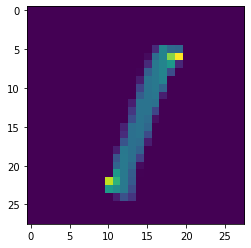

result = 1


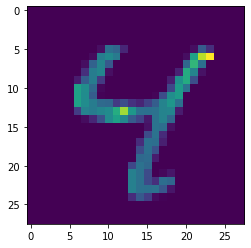

result = 4


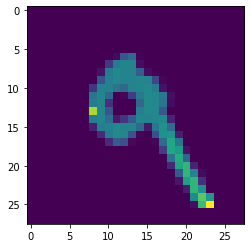

result = 9


In [16]:
import numpy as np
predictions = model.predict(X_test)
for i in range(8):
    plt.imshow(X_test[i])
    plt.show()
    print(f'result = {np.argmax(predictions[i])}')